In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import plotly as py
import matplotlib.pyplot as plt


from tqdm import tqdm, trange
import seaborn as sns
import random
from sklearn import preprocessing


import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold


In [172]:
from sklearn.model_selection import cross_validate

XGBoost Implementation

In [116]:
#https://www.datacamp.com/tutorial/xgboost-in-python
xg_reg=xgb.XGBClassifier()

In [83]:
df_train2_x_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399843 entries, 0 to 1749453
Data columns (total 43 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   meter_reading                  1399843 non-null  float64
 1   square_feet                    1399843 non-null  int64  
 2   year_built                     1399843 non-null  int64  
 3   floor_count                    1399843 non-null  int64  
 4   air_temperature                1399843 non-null  float64
 5   cloud_coverage                 1399843 non-null  int64  
 6   dew_temperature                1399843 non-null  float64
 7   precip_depth_1_hr              1399843 non-null  int64  
 8   sea_level_pressure             1399843 non-null  float64
 9   wind_direction                 1399843 non-null  int64  
 10  wind_speed                     1399843 non-null  float64
 11  air_temperature_std_lag7       1399843 non-null  float64
 12  air_temperatur

In [117]:
xg_reg.fit(df_train2_x_rf, df_train2_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [118]:
predict_xgb=xg_reg.predict(df_val_x_rf)

In [119]:
predict_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
pd.DataFrame(data=[accuracy_score(df_val_y, predict_xgb), recall_score(df_val_y, predict_xgb),
                   precision_score(df_val_y, predict_xgb), roc_auc_score(df_val_y, predict_xgb),f1_score(df_val_y, predict_xgb)], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'F1_score'])

,0
accuracy,0.986898
recall,0.620587
precision,0.894017
roc_auc_score,0.809198
F1_score,0.732621


In [120]:
cm = metrics.confusion_matrix(df_val_y, predict_xgb)
print(cm)

[[338794    744]
 [  3837   6276]]


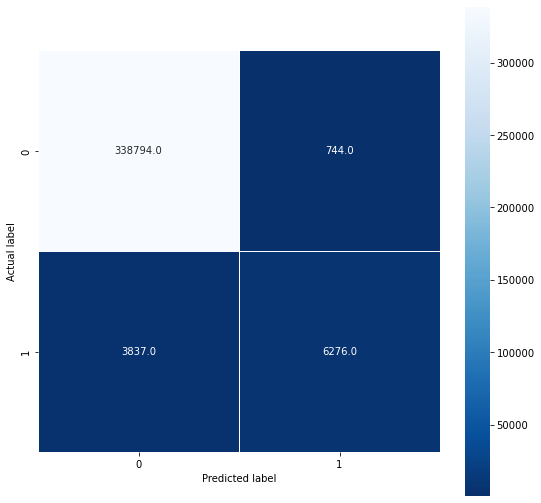

In [121]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.savefig("confusion matrix.png", facecolor='w')

In [207]:
probs_xg=xg_reg.predict_proba(df_val_x_rf)[:,1]


In [208]:
#https://python-bloggers.com/2020/12/roc-and-auc-how-to-evaluate-machine-learning-models-in-no-time/


auc_xg = roc_auc_score(df_val_y, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(df_val_y, probs_xg)

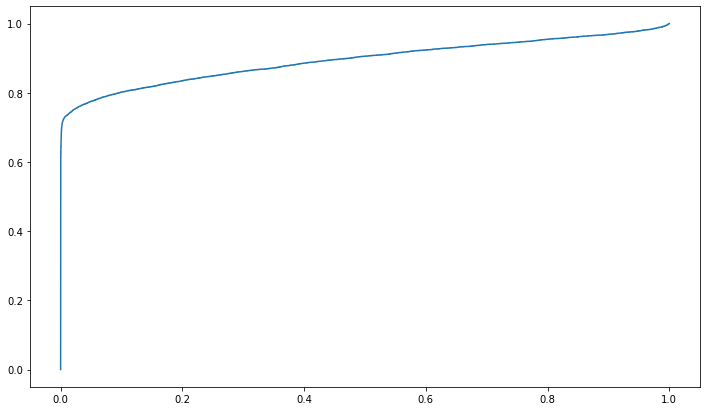

In [209]:
plt.figure(figsize=(12, 7))
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')

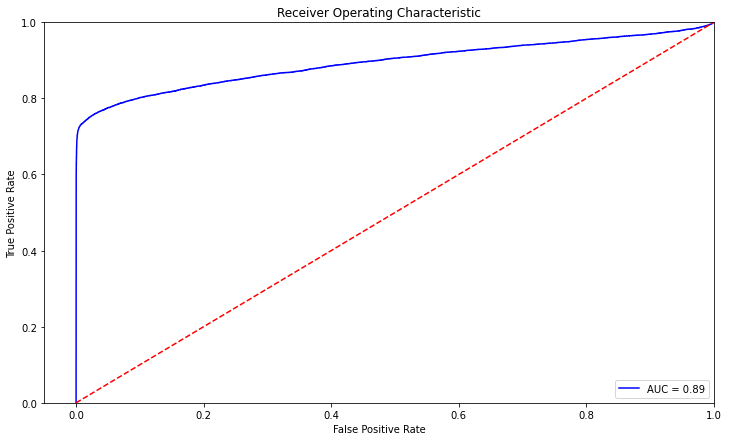

In [221]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# calculate the fpr and tpr for all thresholds of the classification

roc_auc = metrics.auc(fpr_xg, tpr_xg)

# method I: plt

plt.figure(figsize=(12, 7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_xg, tpr_xg, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('auc_roc.png', facecolor='w')

In [219]:
plt.show()


<Figure size 432x288 with 0 Axes>

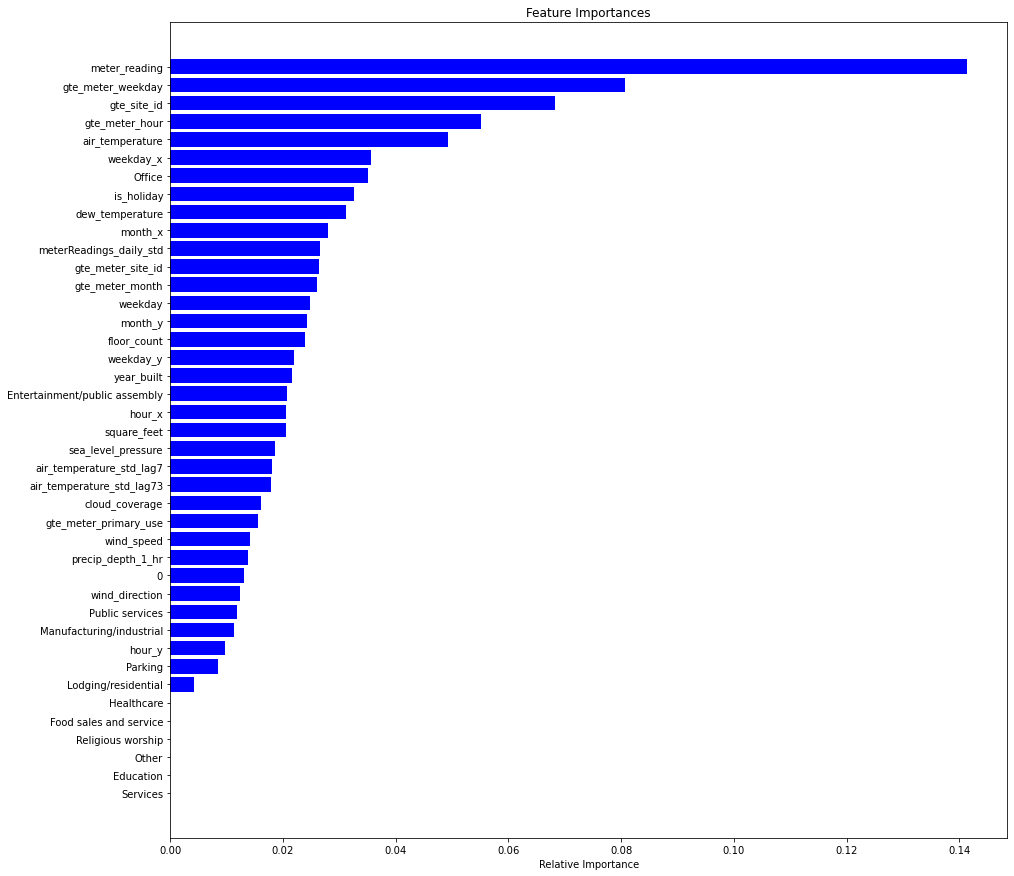

In [122]:
plt.figure(figsize=(15,15))
features = df_train2_x_rf.columns
importances = xg_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('feature_imp.png', facecolor='w', bbox_inches='tight')

In [181]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

params2= {
'max_depth': [5,6,7],
'learning_rate': [0.1, 1.0, 10],
"colsample_bytree": [0.4,0.8,1.0],
"min_child_weight": [1, 5, 10, 20]
}

In [183]:
#https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost/notebook

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xg_reg, param_distributions=params2, n_iter=10, scoring='f1', n_jobs=-1, cv=skf.split(df_train2_x_rf, df_train2_y), verbose=3, random_state=1001 )

In [184]:
random_search.fit(df_train2_x_rf, df_train2_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=5, min_child_weight=20;, score=0.724 total time= 9.6min
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=5, min_child_weight=20;, score=0.731 total time= 9.6min
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=5, min_child_weight=20;, score=0.734 total time= 9.8min
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, min_child_weight=20;, score=0.748 total time=11.6min
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, min_child_weight=20;, score=0.748 total time=11.7min
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, min_child_weight=20;, score=0.739 total time=12.0min
[CV 1/3] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=20;, score=0.739 total time=21.4min
[CV 2/3] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=10;, score=0.74

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fede4d17820>,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_const...
                                           max_leaves=0, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                   

In [185]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=20,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [186]:
random_search.best_params_

{'min_child_weight': 20,
 'max_depth': 6,
 'learning_rate': 1.0,
 'colsample_bytree': 0.8}

In [187]:
xg_update=xgb.XGBClassifier(colsample_bytree=0.8, learning_rate=1.0, max_depth=6, min_child_weight=20)

In [188]:
xg_update.fit(df_train2_x_rf, df_train2_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=20,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [189]:
predict_xgb_update=xg_update.predict(df_val_x_rf)

pd.DataFrame(data=[accuracy_score(df_val_y, predict_xgb_update), recall_score(df_val_y, predict_xgb_update),
                   precision_score(df_val_y, predict_xgb_update), roc_auc_score(df_val_y, predict_xgb_update),f1_score(df_val_y, predict_xgb_update)], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'F1_score'])

,0
accuracy,0.975681
recall,0.685257
precision,0.565714
roc_auc_score,0.834794
F1_score,0.619774


In [134]:
random_search2 = RandomizedSearchCV(xg_reg, param_distributions=params, n_iter=15, scoring='f1', n_jobs=4, cv=5, verbose=3, random_state=1001 )

In [136]:
random_search2.fit(df_train2_x_rf, df_train2_y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 4/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.838 total time= 3.0min
[CV 1/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.656 total time= 3.0min
[CV 2/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.823 total time= 3.0min
[CV 3/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.868 total time= 3.0min
[CV 5/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.848 total time= 2.8min
[CV 1/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.860 total time= 3.7min
[CV 2/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.814 total time= 3.7min
[CV 3/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_chil

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=

In [137]:
random_search2.best_params_

{'subsample': 0.6,
 'min_child_weight': 10,
 'max_depth': 5,
 'gamma': 1,
 'colsample_bytree': 0.6}

In [139]:
xg_update=xgb.XGBClassifier(colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6)

In [140]:
xg_update.fit(df_train2_x_rf, df_train2_y)
predict_xgb_update=xg_update.predict(df_val_x_rf)

pd.DataFrame(data=[accuracy_score(df_val_y, predict_xgb_update), recall_score(df_val_y, predict_xgb_update),
                   precision_score(df_val_y, predict_xgb_update), roc_auc_score(df_val_y, predict_xgb_update),f1_score(df_val_y, predict_xgb_update)], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'F1_score'])

,0
accuracy,0.988308
recall,0.604074
precision,0.986436
roc_auc_score,0.801913
F1_score,0.749295


In [123]:
params2= {
'max_depth': [5,6,7],
'learning_rate': [0.01,0.1, 1.0],
"colsample_bytree": [0.4,0.8,1.0],
"min_child_weight": [1, 5, 10, 20]
}

params3= {
'max_depth': [5,6,7],
'learning_rate': [0.01,0.1, 1.0],
"colsample_bytree": [0.4,0.8,1.0],
"min_child_weight": [1, 5, 10, 20]
}

In [137]:
#used a range of a bunch of parameters that were demonstrated to be most important here: 
random_search3 = RandomizedSearchCV(xg_reg, param_distributions=params2, n_iter=15, scoring='f1', n_jobs=4, cv=5, verbose=3, random_state=1001 )

In [138]:
random_search3.fit(df_train2_x_rf, df_train2_y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=5, min_child_weight=20;, score=0.076 total time= 1.7min
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=5, min_child_weight=20;, score=0.100 total time= 1.7min
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=5, min_child_weight=20;, score=0.265 total time= 1.7min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=5, min_child_weight=20;, score=0.253 total time= 1.7min
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=5, min_child_weight=20;, score=0.050 total time= 1.6min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, min_child_weight=20;, score=0.268 total time= 1.9min
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, min_child_weight=20;, score=0.100 total time= 1.9min
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, min_child_weight=20;, sc

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           max_leaves=0, min_child_weight=1,
                                           missing=nan,
     

In [146]:
#trying to figure out what parameters to use
import sklearn
for metric in sklearn.metrics.SCORERS:
    print(metric)

explained_variance
r2
max_error
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_root_mean_squared_error
neg_mean_poisson_deviance
neg_mean_gamma_deviance
accuracy
top_k_accuracy
roc_auc
roc_auc_ovr
roc_auc_ovo
roc_auc_ovr_weighted
roc_auc_ovo_weighted
balanced_accuracy
average_precision
neg_log_loss
neg_brier_score
adjusted_rand_score
rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted


In [139]:
random_search3.best_params_

{'min_child_weight': 20,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 1.0}

In [140]:
random_search3.best_score_ #?? Doesn't make sense

0.7124981357584225

In [142]:
#not improving over the baseline xgb model
xg_update2=xgb.XGBClassifier(colsample_bytree=1.0,max_depth=5, min_child_weight=20, learning_rate=0.01)
xg_update2.fit(df_train2_x_rf, df_train2_y)
predict_xgb_update2=xg_update2.predict(df_val_x_rf)

pd.DataFrame(data=[accuracy_score(df_val_y, predict_xgb_update2), recall_score(df_val_y, predict_xgb_update2),
                   precision_score(df_val_y, predict_xgb_update2), roc_auc_score(df_val_y, predict_xgb_update2),f1_score(df_val_y, predict_xgb_update2)], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'F1_score'])

,0
accuracy,0.987739
recall,0.588352
precision,0.979585
roc_auc_score,0.793993
F1_score,0.735158


In [180]:
#trying to figure out how many jobs I should run
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 12


In [197]:
#trying to weight the positive targets (16x b/c anomalies are 6% of data)
xg_update3=xgb.XGBClassifier(scale_pos_weight=16)
xg_update3.fit(df_train2_x_rf, df_train2_y)
predict_xgb_update3=xg_update3.predict(df_val_x_rf)

pd.DataFrame(data=[accuracy_score(df_val_y, predict_xgb_update3), recall_score(df_val_y, predict_xgb_update3),
                   precision_score(df_val_y, predict_xgb_update3), roc_auc_score(df_val_y, predict_xgb_update3),f1_score(df_val_y, predict_xgb_update3)], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'F1_score'])

,0
accuracy,0.982168
recall,0.722832
precision,0.680506
roc_auc_score,0.856362
F1_score,0.701031
